# Pryngles module: rings

In [2]:
from pryngles import *

#Aliases
sci=Science

## External modules

In [3]:
import spiceypy as spy
import math as mh
import numpy as np
import copy

## Ring default properties

In [4]:
class RingDefaults(object):
    """
    These are the default attributes for bodies of the kind 'Ring'.
    
    DEVELOPER:
        You may add new attributes as the model gets more complex.
        Please document properly each attribute.
        
    orbit:
    
        (In current version, Ring body does not have orbit attributes)
        
    physics:
    
        fi: float [adimensional], default = 1:
            Fraction of the radius of the primary object where ring stars.
            
        fe: float [adimensional], default = 1:
            Fraction of the radius of the primary object where ring ends.
            
        i: float [radians], default = 0:
            Inclination of the ring with respect to the ecliptic plane.
            
        roll: float [radians], default = 0:
            Roll angle.  This is the angle with respect to ecliptic x-axis in which 
            the normal to the ring plane is rotated.
            
    optics:
    
        nspangles: int, default = 1000: 
            Number of spangles on which the object will be discretized.
            
        albedo_gray_normal: float. default = 1: 
            Lambertian (normal) gray (wavelength indpendent) albedo of the spangle.
            
        tau_gray_optical: float. default = 0:
            Gray (wavelength indpendent) Optical depth of the spangle.  
            If 0 the spangle is entirely opaque to all wavelength, despite its type.            
    """
    orbit=dict()
    
    physics=dict(fi=1.0,fe=2.0,i=0.0,roll=0.0)
    
    optics=dict(nspangles=1000,
                albedo_gray_normal=1,
                tau_gray_optical=0
               )

## Ring Class

In [16]:
BODY_KINDS+=["Ring"]

class Ring(Body):
    """Class Planet.
    
    See Body class documentation.
    
    Additional public attributes:
    
        ri: float [rlu]:
            Radius of the inner border of the ring

        re: float [rlu]:
            Radius of the outer border of the ring
            
        spangles: list of Spangle objects:
            List of spangles covering the surface (for spangle options see Spangle documentation)
    
    Override methods:
    
        update_body(**pars):
            This method compute additional attributes like (see above).
    """
    def __init__(self,
                 primary=None,
                 orbit=RingDefaults.orbit,
                 physics=RingDefaults.physics,
                 optics=RingDefaults.optics
                ):
        
        
        #Instantiate object with basic properties
        Body.__init__(self,RingDefaults,"Ring",primary,orbit,physics,optics)
        
        #Check primary
        if self.primary is None:
            raise ValueError(f"Primary not provided and mandatory for {self.kind}.")
        
        #Update properties
        self.update_body(**self.__dict__)
        
    def update_body(self,**pars):
        Body.update_body(self,**pars)

        #Here place the commands to update this kind of body
        self.physics.ri=self.physics.fi*self.primary.physics.radius
        self.physics.re=self.physics.fe*self.primary.physics.radius
        
        #Rotation axis:
        self.physics.n_equ=sci.cartesian([1,self.physics.roll,90*Consts.deg-self.physics.i])

In [17]:
if IN_JUPYTER:
    def test_init(self):
        
        Verbose.VERBOSITY=VERB_ALL
        
        #Define first star and planet
        S=Star()
        P=Planet(primary=S)

        self.assertRaises(ValueError,lambda:Ring())
        R=Ring(primary=P)
        
        print(R.physics)
        print(R.optics)
        print(R.hash)
        
        R.update_body(physics=dict(fe=3))
        print(R.physics)
        
        Verbose.VERBOSITY=VERB_NONE
        
    class Test(unittest.TestCase):pass    
    Test.test_init=test_init
    unittest.main(argv=['first-arg-is-ignored'],exit=False)

.

      VERB3::_update_childs:: Add child Planet to body Star (8772195706356)
      VERB3::_update_childs:: Add child Ring to body Planet (8772195706182)
{'fi': 1.0, 'fe': 2.0, 'i': 0.0, 'roll': 0.0, 'ri': 1.0, 're': 2.0, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00])}
{'nspangles': 1000, 'albedo_gray_normal': 1, 'tau_gray_optical': 0}
8772195706305
{'fi': 1.0, 'fe': 3, 'i': 0.0, 'roll': 0.0, 'ri': 1.0, 're': 3.0, 'n_equ': array([6.123234e-17, 0.000000e+00, 1.000000e+00])}



----------------------------------------------------------------------
Ran 1 test in 0.026s

OK


In [20]:
def spangle_body(self,seed=0,preset=False):
    """
    Spangle the surface of the planet
    """
    
    #Create spangler
    self.sp=Spangler(
        nspangles=self.optics.nspangles,
        body_hash=self.hash,
        spangle_type=ATMOSPHERIC_SPANGLE,
        n_equ=self.physics.n_equ,
    )
    
    #Populate spangler
    self.sp.populate_spangler(
        scale=self.physics.re,
        seed=seed,
        geometry="ring",
        preset=preset,
        ri=self.physics.fi/self.physics.fe
    )

Ring.spangle_body=spangle_body

      VERB3::_update_childs:: Add child Planet to body Star (8772247252661)
      VERB3::_update_childs:: Add child Ring to body Planet (8772247252715)
  VERB1::set_positions:: Setting positions
      VERB3::set_positions:: Generating equatorial transformation matrices from n_equ = [0.35355339 0.35355339 0.8660254 ]
      VERB3::rotation_matrix:: Rotation axis: [-0.70710678  0.70710678  0.        ] [-0.61237244 -0.61237244  0.5       ] [0.35355339 0.35355339 0.8660254 ]
      VERB3::set_positions:: Updating center in {equ} to [0, 0, 0]
      VERB3::set_positions:: Updating center {ecl} to [0, 0, 0]
  VERB1::set_observer:: Setting observer
      VERB3::set_observer:: Generating observer matrices from n_obs = [0. 0. 1.]
      VERB3::rotation_matrix:: Rotation axis: [1 0 0] [0. 1. 0.] [0. 0. 1.]
  VERB1::update_visibility:: Updating visibility
  VERB1::set_luz:: Setting light-source
      VERB3::set_luz:: Generating light-source matrices from n_luz = [0. 0. 1.]
      VERB3::rotation_matri

<IPython.core.display.Javascript object>


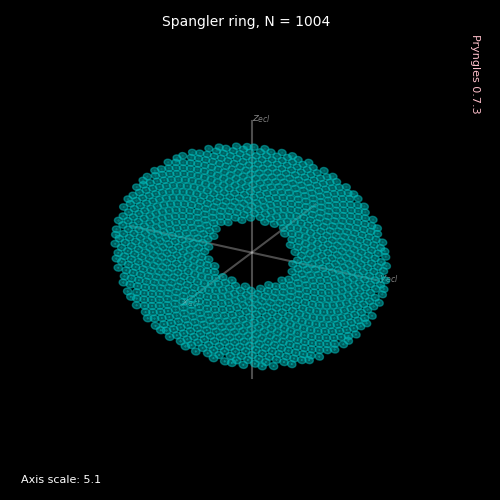

.
----------------------------------------------------------------------
Ran 1 test in 0.900s

OK


In [30]:
if IN_JUPYTER:
    def test_sp(self):
        
        Verbose.VERBOSITY=VERB_ALL
        
        S=Star()
        P=Planet(primary=S)
        R=Ring(primary=P,physics=dict(fi=1.5,fe=5.0,i=30*Consts.deg,roll=45*Consts.deg))
        
        R.spangle_body(preset=True)
        R.sp.plot3d(factor=1.1)
        
        Verbose.VERBOSITY=VERB_NONE
        
    class Test(unittest.TestCase):pass    
    Test.test_sp=test_sp
    unittest.main(argv=['first-arg-is-ignored'],exit=False)

--End--